В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [1]:
x = [1, 3, 4]
sum_x = sum(x)
sum_square_x = sum(num**2 for num in x)
sum_square_x_minus_one = sum( (num - 1)**2 for num in x)

sum_x, sum_square_x, sum_square_x_minus_one

(8, 26, 13)

**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [2]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [3]:
import numpy as np

mean_python = sum(sum_purchases) / len(sum_purchases)
mean_np = np.mean(sum_purchases)

mean_python, mean_np

(667.95, 667.95)

**Завдання 3.** Для того ж набору даних в змінній `ages` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [7]:
sorted_data = sorted(sum_purchases)
n = len(sorted_data)

median_python = (sorted_data[n//2] if n % 2 != 0 else (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2)

median_np = np.median(sum_purchases)

median_python, median_np


(319.0, 319.0)

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [27]:
variance = sum((x - mean_python) ** 2 for x in sum_purchases) / (len(sum_purchases) - 1)
std_python = variance ** 0.5

std_np = np.std(sum_purchases, ddof=1)

std_python, std_np

(1124.5433447451132, 1124.5433447451132)

**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [15]:
age_students = { 16: 10, 17: 25, 18: 20, 20: 2 }

total_students = sum(age_students.values())
total_age = sum( age * num_of_students  for age, num_of_students in age_students.items())
average_python = total_age / total_students

ages = list(age_students.keys())
students = list(age_students.values())
average_np = np.average(ages, weights=students)

average_python, average_np


(17.280701754385966, 17.280701754385966)

**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [16]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [24]:
x_mean = np.mean(sum_purchases)
y_mean = np.mean(visits)
n = len(visits)

cov_xy = 1/(n-1) * sum( (x - x_mean)*(y - y_mean) for x,y in zip(sum_purchases, visits))
std_x_sample = np.sqrt(1/(n-1) * sum( (x - x_mean)**2 for x in sum_purchases))
std_y_sample = np.sqrt(1/(n-1) * sum( (y - y_mean)**2 for y in visits))

pearson_python = cov_xy / (std_x_sample * std_y_sample)

pearson_np = np.corrcoef(sum_purchases, visits)

pearson_python, pearson_np

(-0.30265844687666466,
 array([[ 1.        , -0.30265845],
        [-0.30265845,  1.        ]]))

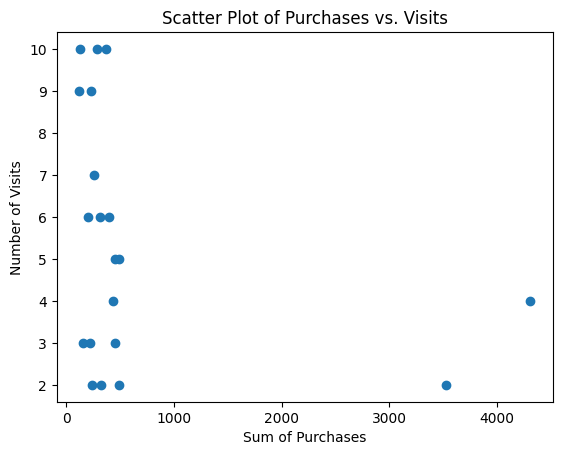

In [17]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

In [41]:
threshold = np.mean(sum_purchases) + 2 * np.std(sum_purchases, ddof=1)

outliers = sum_purchases > threshold

filtered_sum_purchases = np.array(sum_purchases)[~outliers]

filtered_visits = np.array(visits)[~outliers]

np.corrcoef(filtered_sum_purchases, filtered_visits)

array([[ 1.        , -0.36852121],
       [-0.36852121,  1.        ]])

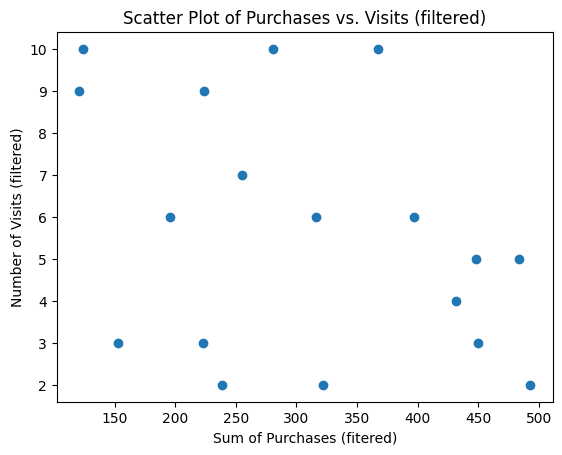

In [43]:
plt.scatter(filtered_sum_purchases, filtered_visits)
plt.title('Scatter Plot of Purchases vs. Visits (filtered)')
plt.xlabel('Sum of Purchases (fitered)')
plt.ylabel('Number of Visits (filtered)');

**Відповідь:**

Вилучення викидів з данних (2 записи про покупки) дозволило прискіпливіше дослідити вибірку даних. Перерахований коефіцієнт кореляції Пірсона становить приблизно -0.369. Це показує, що між кількістю покупок та кількістю відвідувань є слабка зворотня залежність. Це означає, що зі збільшення одного показника інший має тенденцію зменшуватися, але ця тенденція не є виразною.

Дані на графіку розсіяні і між ними не вдається провести лінію, тобто кореляція слабка, а саме - вищі суми покупок не обовʼязково передбачають меншу кількість відвідувань, і навпаки.

Також слабка кореляція вказує, що на взаємовзʼязок можуть впливати інші фактори або що взаємозвʼязок покупок та відвідувань не є лінійним. Ці фактори може бути корисно дослідити.